In [1]:
import pandas

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7A74-7975

 Directory of C:\Users\cobbl\Desktop\DSS_UMSL\Jup

02/20/2025  07:13 PM    <DIR>          .
02/20/2025  07:07 PM    <DIR>          ..
02/20/2025  07:05 PM    <DIR>          .ipynb_checkpoints
02/03/2025  08:42 PM           256,928 Crowdfunding_data_1000_projects.csv
02/03/2025  08:33 PM           194,327 Crowdfunding_data_1000_projects.xlsx
02/20/2025  07:09 PM           668,364 Decision Tree using Crowdfunding data.ipynb
02/20/2025  07:09 PM            56,533 Decision_Tree_using_dummy_data.ipynb
02/20/2025  07:04 PM             9,330 dummy_data.xlsx
02/03/2025  09:32 PM            53,190 M3-1.ipynb
02/10/2025  06:03 PM           176,931 M4_1.ipynb
02/20/2025  07:13 PM             1,262 M5.1.ipynb
02/20/2025  07:12 PM           194,327 M5_Crowdfunding_data_1000_projects.xlsx
02/03/2025  08:44 PM           261,561 modified_data.csv
02/03/2025  08:46 PM           257,670 modified_file.csv
02/03/2025  08:50 PM             5

In [3]:
data=pandas.read_excel('Crowdfunding_data_1000_projects.xlsx')

In [4]:
data.funding_status.value_counts()

funding_status
completed       593
NotCompleted    407
Name: count, dtype: int64

In [6]:
data_for_model=data[['Goal','num_donors','funding_status']]

In [7]:
data_for_model=data_for_model.dropna()

In [27]:
data_for_model

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0
...,...,...,...
995,168.40,2,1
996,355.07,5,1
997,1110.75,19,1
998,2392.41,8,0


In [28]:
data_for_model=data_for_model.replace({"funding_status":{"completed":1,"NotCompleted":0}})

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_for_model, test_size=0.3)

In [30]:
from sklearn import tree

In [31]:
import matplotlib as plt

In [32]:
clf = tree.DecisionTreeClassifier()

In [33]:
clf = clf.fit(train[['Goal','num_donors']], train[['funding_status']])

[Text(0.36675824175824173, 0.9772727272727273, 'x[1] <= 1.5\ngini = 0.482\nsamples = 700\nvalue = [283, 417]'),
 Text(0.07582417582417582, 0.9318181818181818, 'x[1] <= 0.5\ngini = 0.302\nsamples = 221\nvalue = [180, 41]'),
 Text(0.22129120879120878, 0.9545454545454546, 'True  '),
 Text(0.06703296703296703, 0.8863636363636364, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'),
 Text(0.08461538461538462, 0.8863636363636364, 'x[0] <= 308.745\ngini = 0.478\nsamples = 104\nvalue = [63.0, 41.0]'),
 Text(0.026373626373626374, 0.8409090909090909, 'x[0] <= 204.205\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.017582417582417582, 0.7954545454545454, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.035164835164835165, 0.7954545454545454, 'x[0] <= 275.635\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.026373626373626374, 0.75, 'x[0] <= 207.7\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.017582417582417582, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),

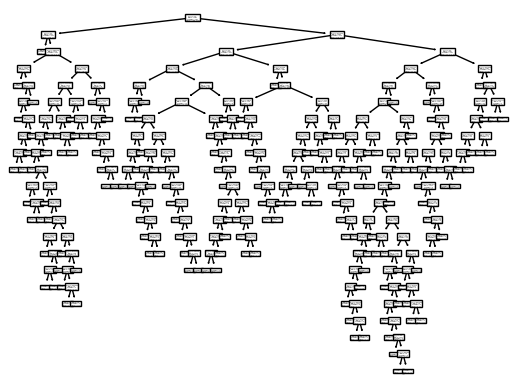

In [34]:
tree.plot_tree(clf.fit(train[['Goal','num_donors']], train[['funding_status']]))

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\cobbl\\Desktop\\DSS_UMSL\\Graphviz\\bin'

In [36]:
import graphviz

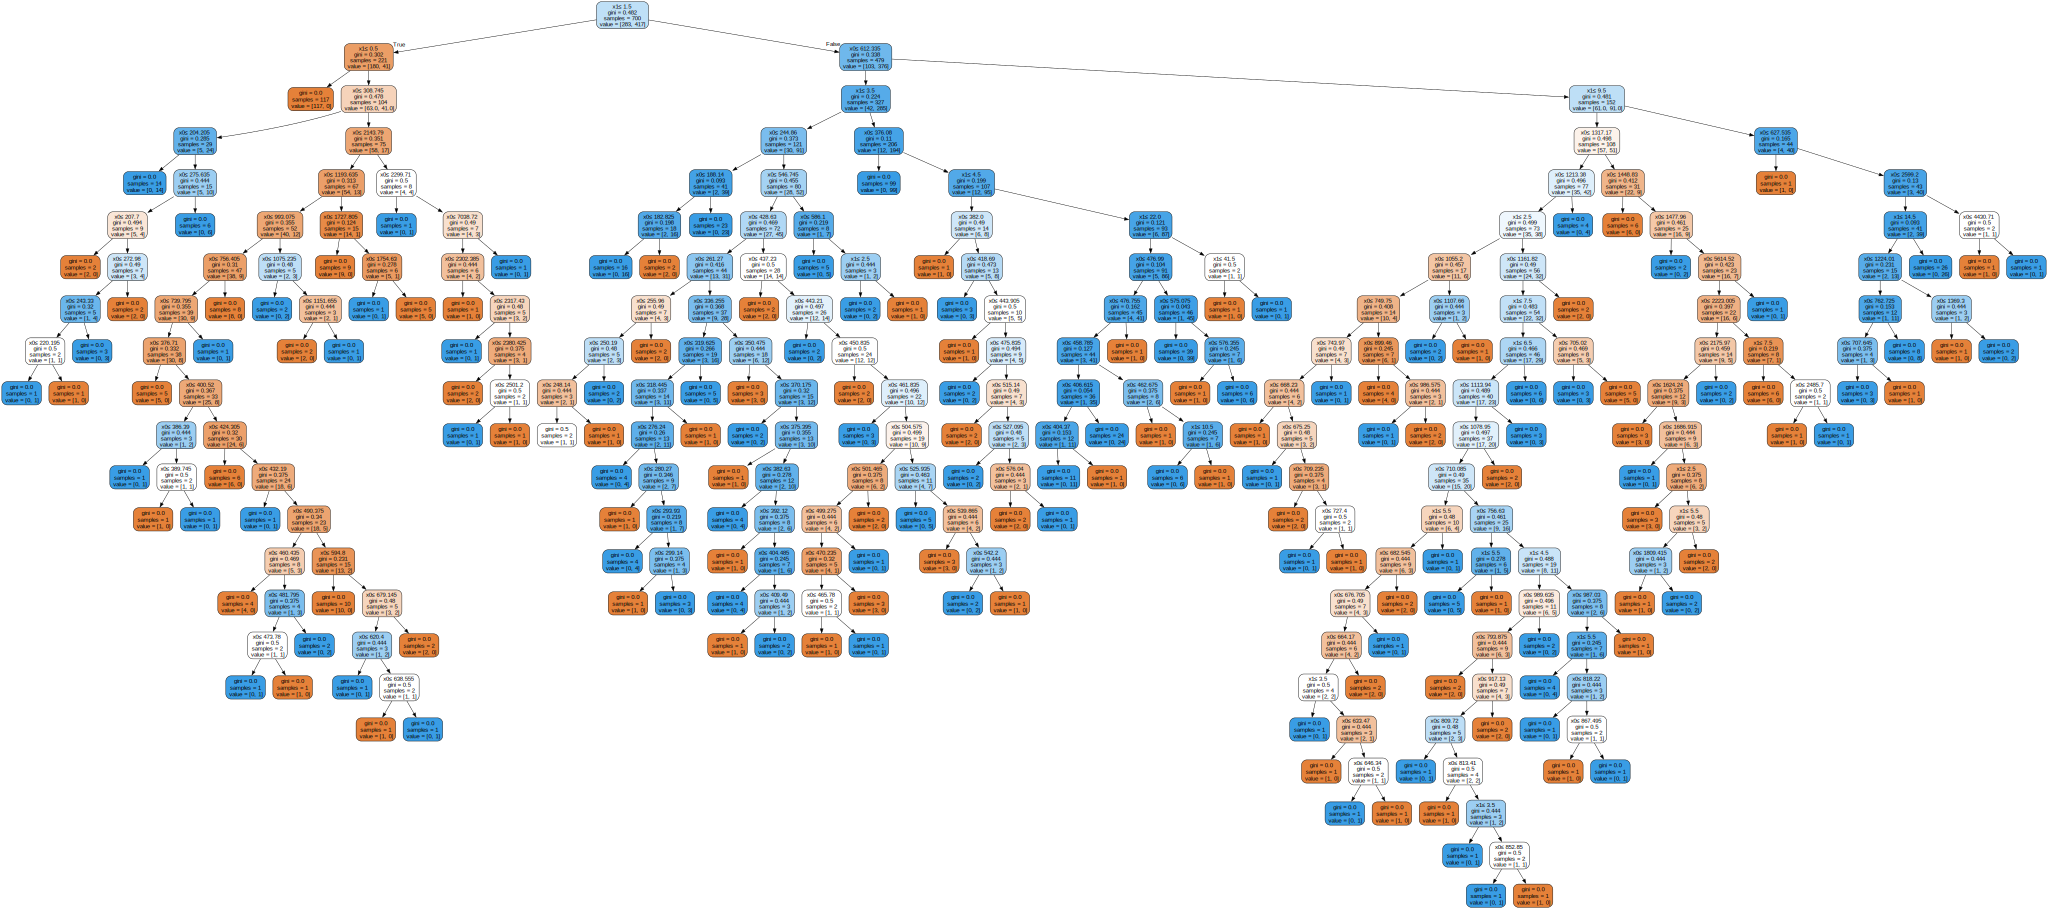

In [37]:
graph_viz_data = tree.export_graphviz(clf, out_file=None, 
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(graph_viz_data)  
graph 

In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\cobbl\\Desktop\\DSS_UMSL\\Graphviz\\bin'

In [39]:
clf.predict(test[['Goal','num_donors']])

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], d

In [40]:
predicted_values=clf.predict(test[['Goal','num_donors']])

In [41]:
test[['funding_status']]

,funding_status
823,1
360,1
784,1
927,0
133,1
...,...
180,0
164,1
537,0
359,1


In [42]:
import sklearn
sklearn.metrics.confusion_matrix(test[['funding_status']], clf.predict(test[['Goal','num_donors']]))

array([[ 91,  33],
       [ 49, 127]], dtype=int64)

In [43]:
sklearn.metrics.confusion_matrix(test[['funding_status']], clf.predict(test[['Goal','num_donors']])).ravel()

array([ 91,  33,  49, 127], dtype=int64)

In [44]:
sklearn.metrics.accuracy_score(test[['funding_status']], clf.predict(test[['Goal','num_donors']]))

0.7266666666666667

In [ ]:
#second model

In [62]:
data=pandas.read_excel('Crowdfunding_data_1000_projects.xlsx')

In [63]:
data.funding_status.value_counts()

funding_status
completed       593
NotCompleted    407
Name: count, dtype: int64

In [64]:
second_model=data[['Goal','funding_status']]

In [65]:
second_model=second_model.dropna()

In [66]:
second_model

,Goal,funding_status
0,887.15,completed
1,761.52,NotCompleted
2,266.55,completed
3,808.15,NotCompleted
4,1296.65,NotCompleted
...,...,...
995,168.40,completed
996,355.07,completed
997,1110.75,completed
998,2392.41,NotCompleted


In [67]:
second_model=second_model.replace({"funding_status":{"completed":1,"NotCompleted":0}})

C:\Users\cobbl\AppData\Local\Temp\ipykernel_2916\2300407253.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  second_model=second_model.replace({"funding_status":{"completed":1,"NotCompleted":0}})


In [68]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(second_model, test_size=0.3)

In [69]:
from sklearn import tree

In [70]:
import matplotlib as plt

In [71]:
clf2 = tree.DecisionTreeClassifier()

In [74]:
clf2 = clf2.fit(train[['Goal']], train[['funding_status']])

[Text(0.4102342549923195, 0.9907407407407407, 'x[0] <= 366.67\ngini = 0.487\nsamples = 700\nvalue = [294, 406]'),
 Text(0.195852534562212, 0.9722222222222222, 'x[0] <= 311.53\ngini = 0.323\nsamples = 222\nvalue = [45, 177]'),
 Text(0.3030433947772658, 0.9814814814814814, 'True  '),
 Text(0.11059907834101383, 0.9537037037037037, 'x[0] <= 185.585\ngini = 0.275\nsamples = 176\nvalue = [29, 147]'),
 Text(0.07987711213517665, 0.9351851851851852, 'x[0] <= 157.355\ngini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(0.07373271889400922, 0.9166666666666666, 'x[0] <= 156.355\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.06758832565284179, 0.8981481481481481, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07987711213517665, 0.8981481481481481, 'x[0] <= 156.91\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.07373271889400922, 0.8796296296296297, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08602150537634409, 0.8796296296296297, 'x[0] <= 157.025\ngini = 0.5\nsamples = 2\nv

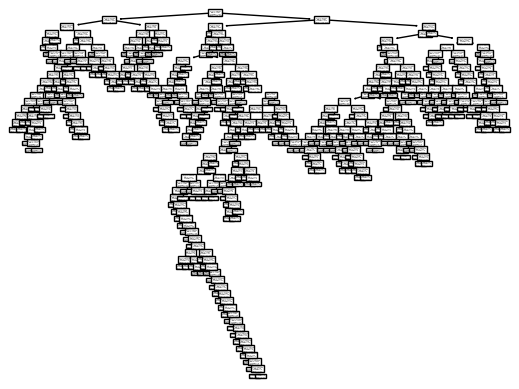

In [75]:
tree.plot_tree(clf2.fit(train[['Goal']], train[['funding_status']]))

In [76]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\cobbl\\Desktop\\DSS_UMSL\\Graphviz\\bin'

In [77]:
import graphviz

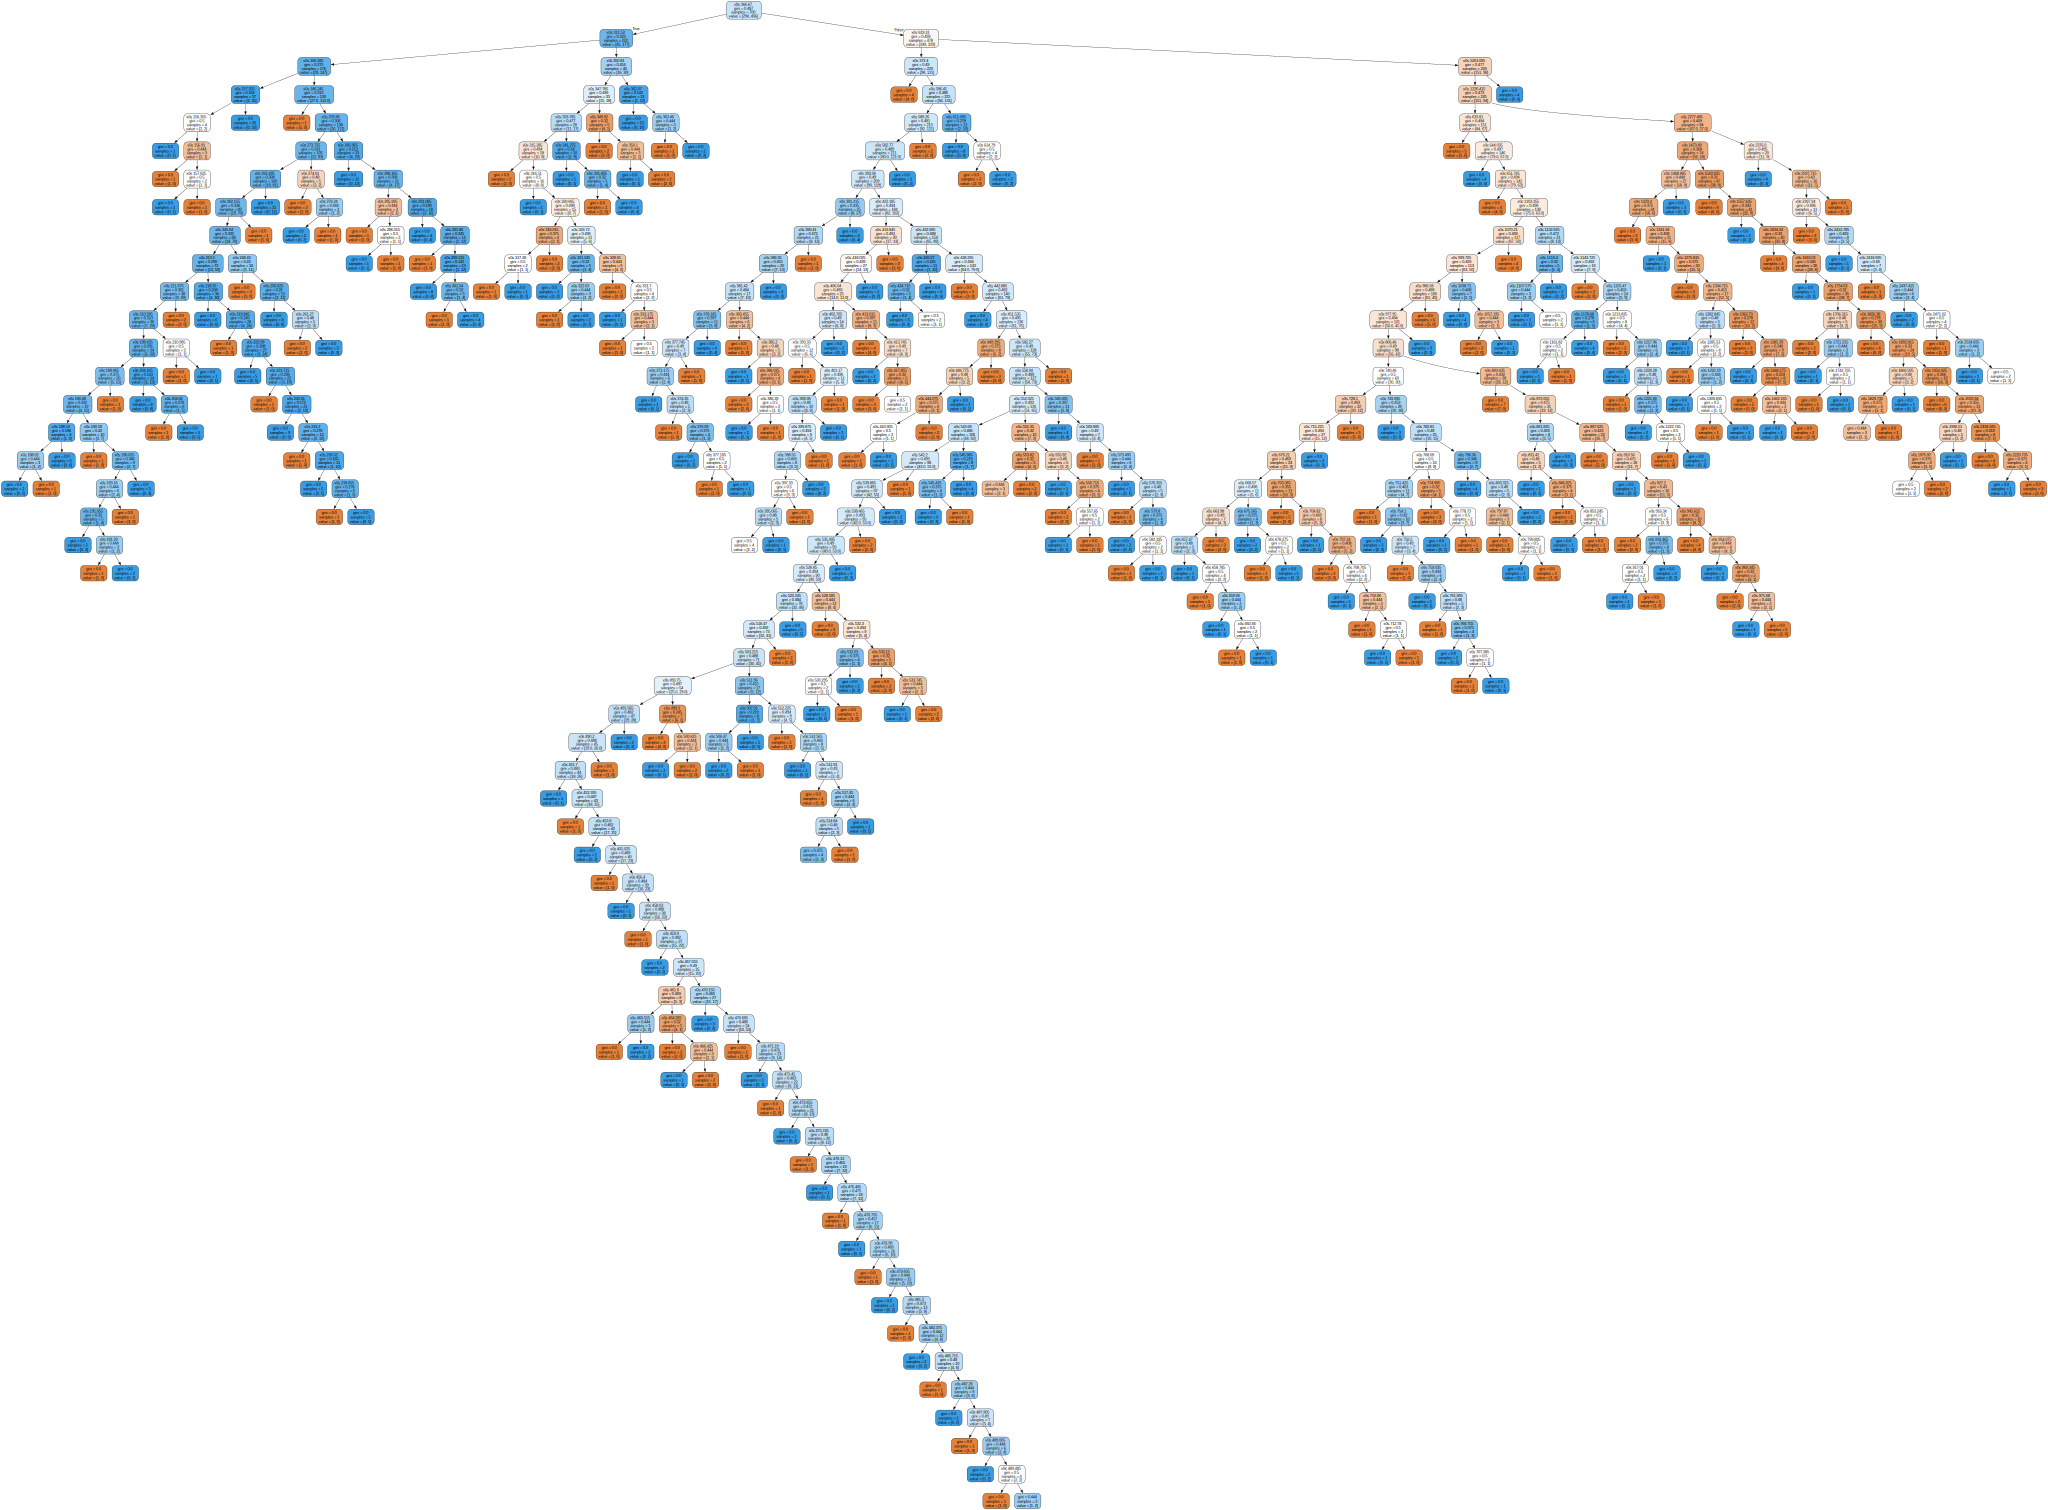

In [78]:
graph_viz_data = tree.export_graphviz(clf2, out_file=None, 
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(graph_viz_data)  
graph 

In [79]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\cobbl\\Desktop\\DSS_UMSL\\Graphviz\\bin'

In [81]:
clf2.predict(test[['Goal']])

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], d

In [82]:
predicted_values=clf2.predict(test[['Goal',]])

In [83]:
test[['funding_status']]

,funding_status
93,1
370,1
633,1
974,1
931,1
...,...
284,0
783,0
900,1
663,1


In [84]:
import sklearn
sklearn.metrics.confusion_matrix(test[['funding_status']], clf2.predict(test[['Goal']]))

array([[ 57,  56],
       [ 70, 117]], dtype=int64)

In [85]:
sklearn.metrics.confusion_matrix(test[['funding_status']], clf2.predict(test[['Goal']])).ravel()

array([ 57,  56,  70, 117], dtype=int64)

In [86]:
sklearn.metrics.accuracy_score(test[['funding_status']], clf2.predict(test[['Goal']]))

0.58

In [ ]:
#the first model had an accuracy score of ~0.73 while the second model only score 0.58